# Intel Irrigation Analysis on the Dataset Capture from the IOT device with Major Parameters Temperature, Pressure, Amplitude, Soil Moiture, Datetime and Class

In [32]:
#import libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
#load dataset from the local directory
df = pd.read_csv(os.getcwd()+"\data.csv")
df.head()

,id,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,1,29.10,9984.53,12.21-,377,0,0,Very Dry,08/10/2022,22:06:24
1,2,29.08,9984.36,12.22-,379,0,0,Very Dry,08/10/2022,22:06:24
2,3,29.06,9984.56,12.20-,376,0,0,Very Dry,08/10/2022,22:06:24
3,4,29.05,9984.39,12.22-,377,0,0,Very Dry,08/10/2022,22:06:24
4,5,29.03,9984.42,12.21-,379,0,0,Very Dry,08/10/2022,22:06:24


In [63]:
#Data exploration and cleaning
df2 = df.dropna(how='all')

#Load into pandas DataFrame and make the soil miosture values absolute
df2 = pd.DataFrame(df2)
df2['soilmiosture'] = df2['soilmiosture'].abs()
df2['altitude'] = 675.6

#dict_index = {'Very Dry':0, 'Dry':1, 'Very Wet':2, 'Wet':3}
#df2 = df2.replace({'class': dict_index})
    
df2.head()

,id,temperature,pressure,altitude,soilmiosture,note,status,class,date,time
0,1,29.10,9984.53,675.6,377,0,0,Very Dry,08/10/2022,22:06:24
1,2,29.08,9984.36,675.6,379,0,0,Very Dry,08/10/2022,22:06:24
2,3,29.06,9984.56,675.6,376,0,0,Very Dry,08/10/2022,22:06:24
3,4,29.05,9984.39,675.6,377,0,0,Very Dry,08/10/2022,22:06:24
4,5,29.03,9984.42,675.6,379,0,0,Very Dry,08/10/2022,22:06:24


In [64]:
df2.shape

(4688, 10)

In [88]:
df2.corr()

,id,temperature,pressure,altitude,soilmiosture,note,status
id,1.000000,0.012024,-0.011548,NaN,-0.032764,0.009338,-0.017455
temperature,0.012024,1.000000,0.069229,NaN,-0.105001,0.034205,0.028588
pressure,-0.011548,0.069229,1.000000,NaN,0.033845,-0.007703,0.003589
altitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN
soilmiosture,-0.032764,-0.105001,0.033845,NaN,1.000000,-0.974013,-0.897637
note,0.009338,0.034205,-0.007703,NaN,-0.974013,1.000000,0.908939
status,-0.017455,0.028588,0.003589,NaN,-0.897637,0.908939,1.000000


In [179]:
df2.describe()

,id,temperature,pressure,altitude,soilmiosture,note,status
count,4688.000000,4688.000000,4688.000000,4.688000e+03,4688.000000,4688.000000,4688.000000
mean,2344.500000,29.599089,9963.153215,6.756000e+02,243.796075,1.878413,0.703712
std,1353.453361,5.842685,1383.602527,5.684948e-11,75.844348,1.152977,0.456668
min,1.000000,27.970000,-2120.400000,6.756000e+02,0.000000,0.000000,0.000000
25%,1172.750000,28.630000,9935.255000,6.756000e+02,171.000000,1.000000,0.000000
50%,2344.500000,29.180000,9969.535000,6.756000e+02,233.000000,2.000000,1.000000
75%,3516.250000,29.990000,9975.700000,6.756000e+02,326.000000,3.000000,1.000000
max,4688.000000,178.700000,99931.100000,6.756000e+02,480.000000,3.000000,1.000000


In [65]:
#Plot a seaborn graph to illustrate a IOT dataset


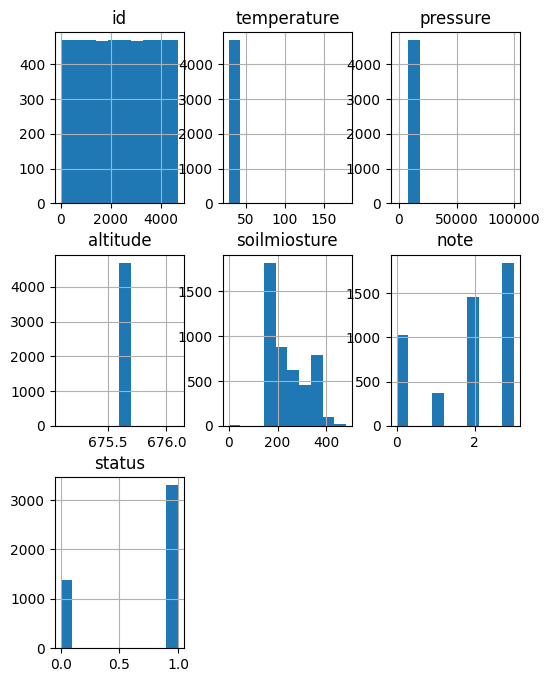

In [263]:
#classify X and Y into dependant and independant veriable
Y = df2.loc[:, ['class']] # Inependent variable
X = df2.loc[:, ['pressure', 'soilmiosture']] # dependent variable-

df2.hist(bins=10, figsize=(6, 8))
plt.show()

In [313]:
#split dataset into train and test ratio 80:20
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size = 0.5)
#plt.scatter(x_train, x_test)

In [314]:
#initializethe model
gnb = GaussianNB()
#build the model
model = gnb.fit(x_train, y_train.values.ravel())

In [315]:
#Model Prediction
pred = model.predict(x_test)

In [316]:
#ML Evaluation and performance
print(accuracy_score(y_test, pred))

0.9671501706484642


In [317]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         Dry       0.85      0.72      0.78       179
    Very Dry       0.92      0.96      0.94       516
    Very Wet       1.00      1.00      1.00       938
         Wet       0.99      1.00      0.99       711

    accuracy                           0.97      2344
   macro avg       0.94      0.92      0.93      2344
weighted avg       0.97      0.97      0.97      2344



In [295]:
print(confusion_matrix(y_test, pred))

[[129  44   0   6]
 [ 22 494   0   0]
 [  0   0 934   4]
 [  0   0   1 710]]


In [296]:
#initializethe Random forest model
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc_model = rfc.fit(x_train, y_train.values.reshape(-1,))

In [297]:
rfc_pred = rfc_model.predict(x_test)

In [298]:
#ML Evaluation and performance
print(accuracy_score(y_test, rfc_pred))

0.9001706484641638


In [299]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

         Dry       0.00      0.00      0.00       179
    Very Dry       0.73      0.89      0.80       516
    Very Wet       1.00      1.00      1.00       938
         Wet       0.92      1.00      0.96       711

    accuracy                           0.90      2344
   macro avg       0.66      0.72      0.69      2344
weighted avg       0.84      0.90      0.87      2344



C:\Users\chine\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chine\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chine\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [300]:
print(confusion_matrix(y_test, rfc_pred))

[[  0 171   0   8]
 [  0 461   0  55]
 [  0   0 938   0]
 [  0   0   0 711]]


In [301]:
# intialize DecisionTree Model
dctree = DecisionTreeClassifier(random_state=0)
dctree_model = dctree.fit(x_train, y_train)

In [302]:
#Model Prediction of decision tree
dctree_pred = dctree_model.predict(x_test)
dctree_pred 


array(['Wet', 'Very Wet', 'Wet', ..., 'Very Dry', 'Wet', 'Very Dry'],
      dtype=object)

In [303]:
#Evaluation decision tree model
print(accuracy_score(y_test, dctree_pred))


1.0


In [304]:
print(classification_report(y_test, dctree_pred))

              precision    recall  f1-score   support

         Dry       1.00      1.00      1.00       179
    Very Dry       1.00      1.00      1.00       516
    Very Wet       1.00      1.00      1.00       938
         Wet       1.00      1.00      1.00       711

    accuracy                           1.00      2344
   macro avg       1.00      1.00      1.00      2344
weighted avg       1.00      1.00      1.00      2344



In [305]:
print(confusion_matrix(y_test, dctree_pred))

[[179   0   0   0]
 [  0 516   0   0]
 [  0   0 938   0]
 [  0   0   0 711]]


In [306]:
# intialize Deci sionTree Model 
sclf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
sclf_model= sclf.fit(x_train, y_train.values.reshape(-1,))

In [307]:
#Model Prediction of decision tree
sclf_pred = sclf_model.predict(x_test)
sclf_pred 

array(['Wet', 'Very Wet', 'Wet', ..., 'Very Dry', 'Wet', 'Very Dry'],
      dtype=object)

In [308]:
#Evaluation SVM model
print(accuracy_score(y_test, sclf_pred))

0.9850682593856656
